Batch Gradient Descent Theta: [[4.21509616]
 [2.77011339]]
Stochastic Gradient Descent Theta: [[4.00597696]
 [2.27516959]]
Mini-Batch Gradient Descent Theta: [[4.21288728]
 [2.77605783]]


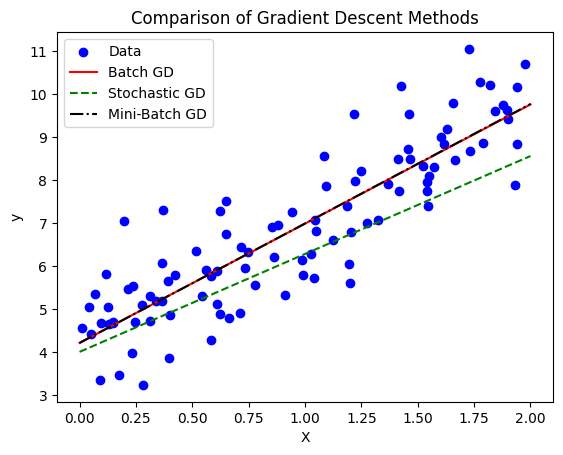

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add bias term (X0 = 1)
X_b = np.c_[np.ones((100, 1)), X]

# Batch Gradient Descent
def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # Random initialization
    for iteration in range(n_iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    m = len(X)
    theta = np.random.randn(2, 1)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, batch_size=10):
    m = len(X)
    theta = np.random.randn(2, 1)
    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_mini = X_shuffled[i:i+batch_size]
            y_mini = y_shuffled[i:i+batch_size]
            gradients = (2/batch_size) * X_mini.T.dot(X_mini.dot(theta) - y_mini)
            theta -= learning_rate * gradients
    return theta

# Train models
theta_bgd = batch_gradient_descent(X_b, y)
theta_sgd = stochastic_gradient_descent(X_b, y)
theta_mbgd = mini_batch_gradient_descent(X_b, y)

# Print results
print("Batch Gradient Descent Theta:", theta_bgd)
print("Stochastic Gradient Descent Theta:", theta_sgd)
print("Mini-Batch Gradient Descent Theta:", theta_mbgd)

# Plotting the results
plt.scatter(X, y, color='blue', label='Data')
x_line = np.array([[0], [2]])
x_b_line = np.c_[np.ones((2, 1)), x_line]
plt.plot(x_line, x_b_line.dot(theta_bgd), 'r-', label='Batch GD')
plt.plot(x_line, x_b_line.dot(theta_sgd), 'g--', label='Stochastic GD')
plt.plot(x_line, x_b_line.dot(theta_mbgd), 'k-.', label='Mini-Batch GD')
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Gradient Descent Methods")
plt.show()